**Data Cleaning and Feature Engineering:**

 **read CSV file**

In [2]:
import pandas as pd

# Load the dataset
#data = pd.read_csv('path/to/diabetes+dataset.csv')  # Replace with the actual file path
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Display general information and summary statistics
display(data.info())
display(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

None

Postal Code     Model Year  Electric Range      Base MSRP  \
count  210161.000000  210165.000000   210160.000000  210160.000000   
mean    98178.209406    2021.048657       50.602241     897.676889   
std      2445.429402       2.988941       86.973210    7653.588604   
min      1731.000000    1999.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98374.000000    2023.000000       42.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         209720.000000    2.101650e+05       2.101610e+05  
mean              28.929954    2.290774e+08       5.297929e+10  
std               14.908392    7.115519e+07       1.551466e+09  
min                1.000000    4.469000e+03       1.001020e+09  
25%               17.000000    1.948816e+08       5.303301e+10  
50%               32.000000    2.405164e+08       5.303303e+10  
75%               42.000000    2.629758e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.602100e+10

Missing Values:
 County                    4
City                      4
Postal Code               4
Electric Range            5
Base MSRP                 5
Legislative District    445
Vehicle Location         10
Electric Utility          4
2020 Census Tract         4
dtype: int64


**1. document missing value**

In [114]:
df.isnull().sum()


VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Base MSRP                                              5
Legislative District                                 445
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64


 **2. Missing value strategies**



In [149]:
# fill missing county by mode
df['County'].fillna(df['County'].mode()[0],inplace=True)

# fill missing city by mode
df['City'].fillna(df['City'].mode()[0],inplace=True)

# drop missing postal code
df.dropna(subset=['Postal Code'],inplace=True)

#fill missing base MSRP by mdeian
df['Base MSRP'].fillna(df['Base MSRP'].median(),inplace=True)

#fill legislative district by mean
df['Legislative District'].fillna(df['Legislative District'].mean(),inplace=True)

#drop missing vehicle location
df.dropna(subset=['Vehicle Location'],inplace=True)


#mean strategy
df['Electric Range'].fillna(df['Electric Range'].mean(),inplace=True)


df.isnull().sum()

<ipython-input-149-3e6f08535f4e>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-149-3e6f08535f4e>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**3. One Hot Encoder**

In [116]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohead = ohe.fit_transform(df[['Make']])
ohead.head()

# ohe2 = pd.get_dummies(df.Model)
# ohrad2 = pd.concat([df,ohe2],axis=1).drop(columns=['Model'])
# ohrad2.head()
# ohead = pd.concat([df,ohead],axis=1).drop(columns=['Make'])
# ohe2.head()

Make_ACURA  Make_ALFA ROMEO  Make_AUDI  Make_AZURE DYNAMICS  Make_BENTLEY  \
0         0.0              0.0        0.0                  0.0           0.0   
1         0.0              0.0        0.0                  0.0           0.0   
2         0.0              0.0        0.0                  0.0           0.0   
3         0.0              0.0        0.0                  0.0           0.0   
4         0.0              0.0        0.0                  0.0           0.0   

   Make_BMW  Make_CADILLAC  Make_CHEVROLET  Make_CHRYSLER  Make_DODGE  ...  \
0       1.0            0.0             0.0            0.0         0.0  ...   
1       0.0            0.0             0.0            0.0         0.0  ...   
2       0.0            0.0             0.0            0.0         0.0  ...   
3       0.0            0.0             0.0            0.0         0.0  ...   
4       0.0            0.0             0.0            0.0         0.0  ...   

   Make_ROLLS-ROYCE  Make_SMART  Make_SUBARU  Make_TESLA  Make_TH!NK  \
0               0.0         0.0          0.0         0.0         0.0   
1               0.0         0.0          0.0         1.0         0.0   
2               0.0         0.0          0.0         0.0         0.0   
3               0.0         0.0          0.0         1.0         0.0   
4               0.0         0.0          0.0         0.0         0.0   

   Make_TOYOTA  Make_VINFAST  Make_VOLKSWAGEN  Make_VOLVO  \
0          0.0           0.0              0.0         0.0   
1          0.0           0.0              0.0         0.0   
2          0.0           0.0              0.0         0.0   
3          0.0           0.0              0.0         0.0   
4          0.0           0.0              0.0         0.0   

   Make_WHEEGO ELECTRIC CARS  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 43 columns]

**4. Normalization**

In [119]:
#by scaling
#df['Electric Range'] = df['Electric Range']/df['Electric Range'].max()

#by min-max
df['Electric Range'] = (df['Electric Range']-df['Electric Range'].min())/(df['Electric Range'].max()-df['Electric Range'].min())
df['Legislative District'] = (df['Legislative District']-df['Legislative District'].min())/(df['Legislative District'].max()-df['Legislative District'].min())
df['Base MSRP'] = (df['Base MSRP']-df['Base MSRP'].min())/(df['Base MSRP'].max()-df['Base MSRP'].min())
#by z scorce
#df['Electric Range'] = (df['Electric Range']-df['Electric Range'].mean())/df['Electric Range'].std()

df.head()

VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible        0.089021   
1           Clean Alternative Fuel Vehicle Eligible        0.637982   
2             Not eligible due to low battery range        0.044510   
3           Clean Alternative Fuel Vehicle Eligible        0.637982   
4           Clean Alternative Fuel Vehicle Eligible        0.445104   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0              0.708333       267929112   
1        0.0              0.458333       475911439   
2        0.0              0.000000       101971278   
3        0.0              0.458333       474363746   
4        0.0              0.916667       476346482   

                  Vehicle Location  \
0  POINT (-122.8728334 47.5798304)   
1  POINT (-122.6368884 47.7469547)   
2    POINT (-122.206146 47.839957)   
3  POINT (-122.6231895 47.5930874)   
4      POINT (-122.13158 47.67858)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.303509e+10  
1                         PUGET SOUND ENERGY INC       5.303509e+10  
2                         PUGET SOUND ENERGY INC       5.306105e+10  
3                         PUGET SOUND ENERGY INC       5.303508e+10  
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10

**Exploratory Data Analysis**

---


**5. Descriptive Statistics**

In [147]:
#mean
print('Electric Range mean =' ,df['Electric Range'].mean(),'  Legislative District mean =' ,df['Legislative District'].mean(),'  Base MSRP mean =' ,df['Base MSRP'].mean())
#median
print('Electric Range median =' ,df['Electric Range'].median(),'               Legislative District median =' ,df['Legislative District'].median(),'Base MSRP median =' ,df['Base MSRP'].median())

#standard deviation
print('Electric Range std =' ,df['Electric Range'].std(),'   Legislative District std =' ,df['Legislative District'].std(),'  Base MSRP std =' ,df['Base MSRP'].std())


Electric Range mean = 0.1501560210983959   Legislative District mean = 0.5818799526751172   Base MSRP mean = 0.0010618824736152055
Electric Range median = 0.0                Legislative District median = 0.6458333333333334 Base MSRP median = 0.0
Electric Range std = 0.2580809626199416    Legislative District std = 0.31026792338992387   Base MSRP std = 0.009056232377523865


**6. Spatial Distribution**

In [121]:
import plotly.express as px

# Create a DataFrame
location = pd.DataFrame(df)

# Extract longitude and latitude from the 'Vehicle Location' column
location['longitude'] = df['Vehicle Location'].apply(lambda x: float(x.split()[1][1:]))  # Extract longitude
location['latitude'] = df['Vehicle Location'].apply(lambda x: float(x.split()[2].strip(')')))  # Extract latitude

# Create a scatter map using Plotly
fig = px.scatter_mapbox(
    location,
    lat='latitude',
    lon='longitude',
    hover_name='City',
     color='State',
    zoom=2,
    mapbox_style='open-street-map',  # You can change the map style
    title='Spatial Distribution of Electric Vehicles'  # Map title
)

# Update marker appearance
fig.update_traces(marker=dict(opacity=0.7, ))

# Show the map
fig.show()



**7. Model Popularity**

Model
MODEL Y           44037
MODEL 3           32519
LEAF              13606
MODEL S            7795
BOLT EV            6779
MODEL X            6238
VOLT               4814
ID.4               4716
MUSTANG MACH-E     4363
WRANGLER           4115
Name: count, dtype: int64


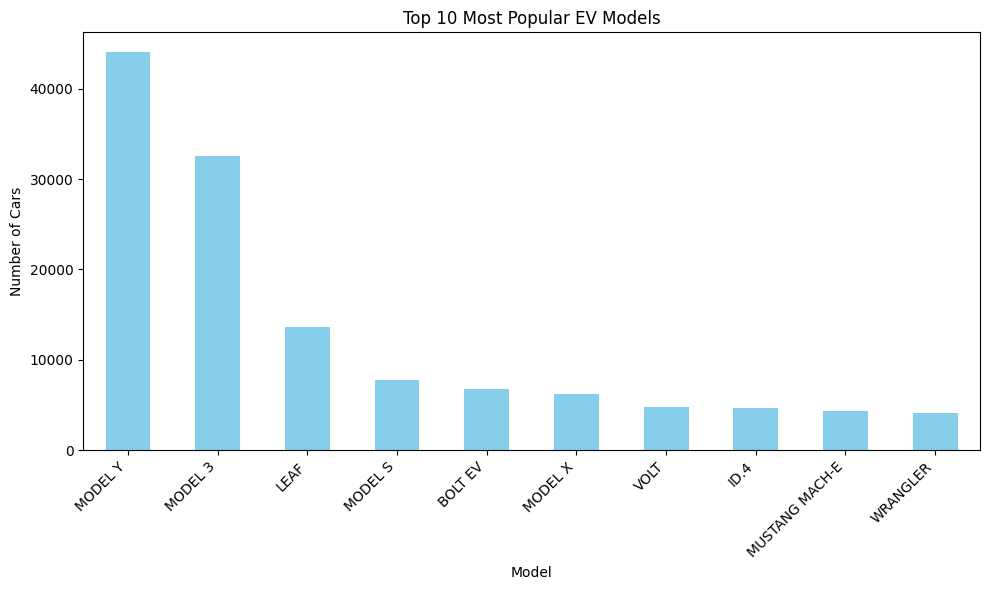

In [122]:



# Select the top 10 most popular models
top_10_models = df['Model'].value_counts().head(10)

# Display the top 10 models and their counts
print(top_10_models)

# Plot the top 10 most popular EV models
plt.figure(figsize=(10, 6))
top_10_models.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular EV Models')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**8. Investigate the correlation**

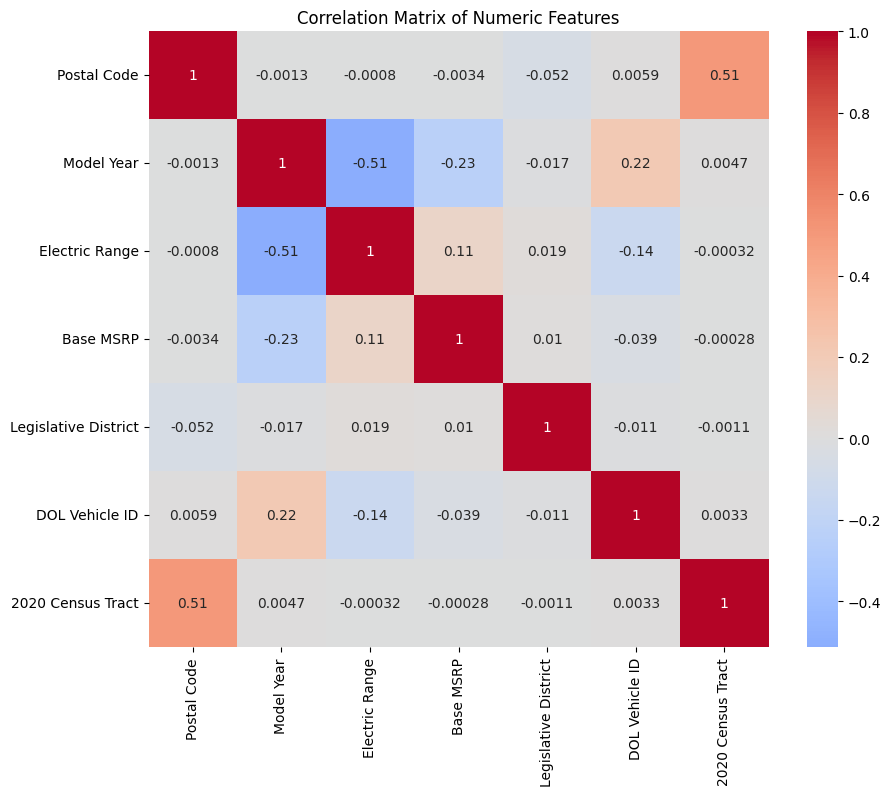

In [109]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**9. Data Exploration Visualizations**

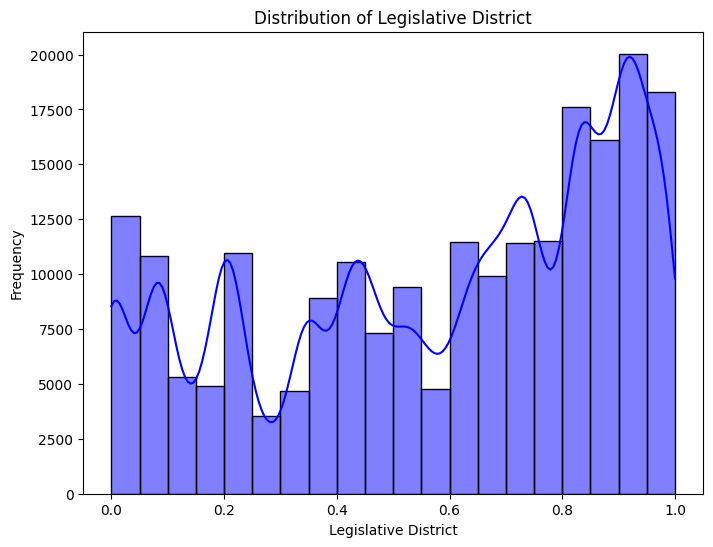

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Legislative District'], bins=20, kde=True, color='blue')
plt.title('Distribution of Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Frequency')
plt.show()

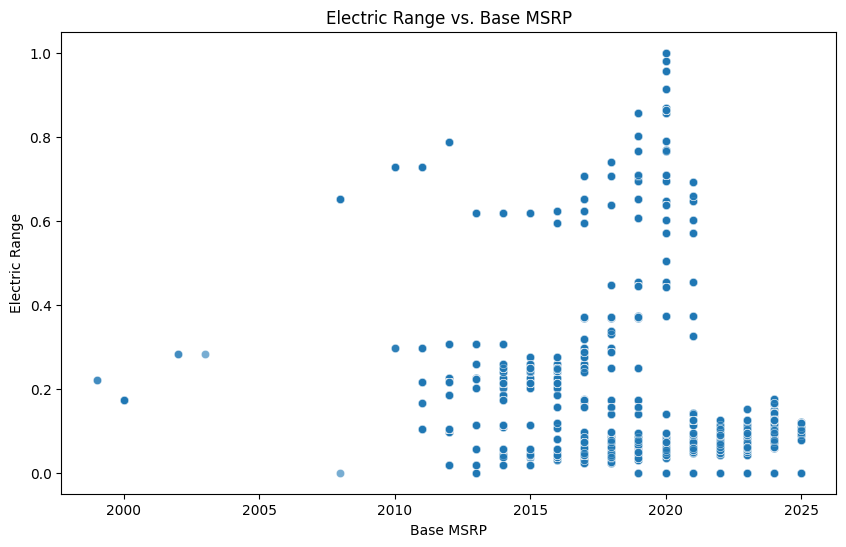

In [19]:
# Scatterplot for Electric Range vs. Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=df, alpha=0.6)
plt.title('Electric Range vs. Model year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()


**10. Comparative Visualization**

City
Seattle      33854
Bellevue     10414
Vancouver     7475
Redmond       7438
Bothell       6877
Renton        6132
Kirkland      6093
Sammamish     5995
Olympia       5079
Tacoma        4454
Name: count, dtype: int64


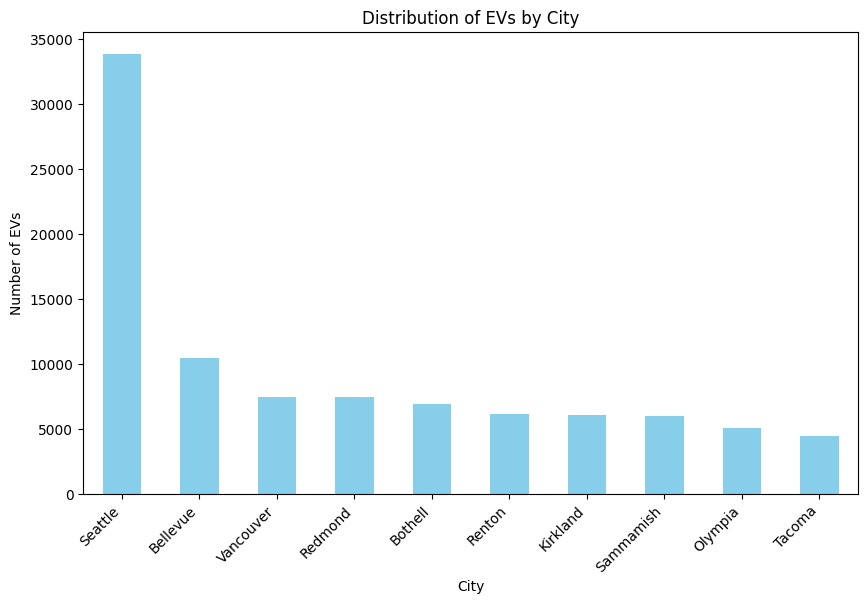

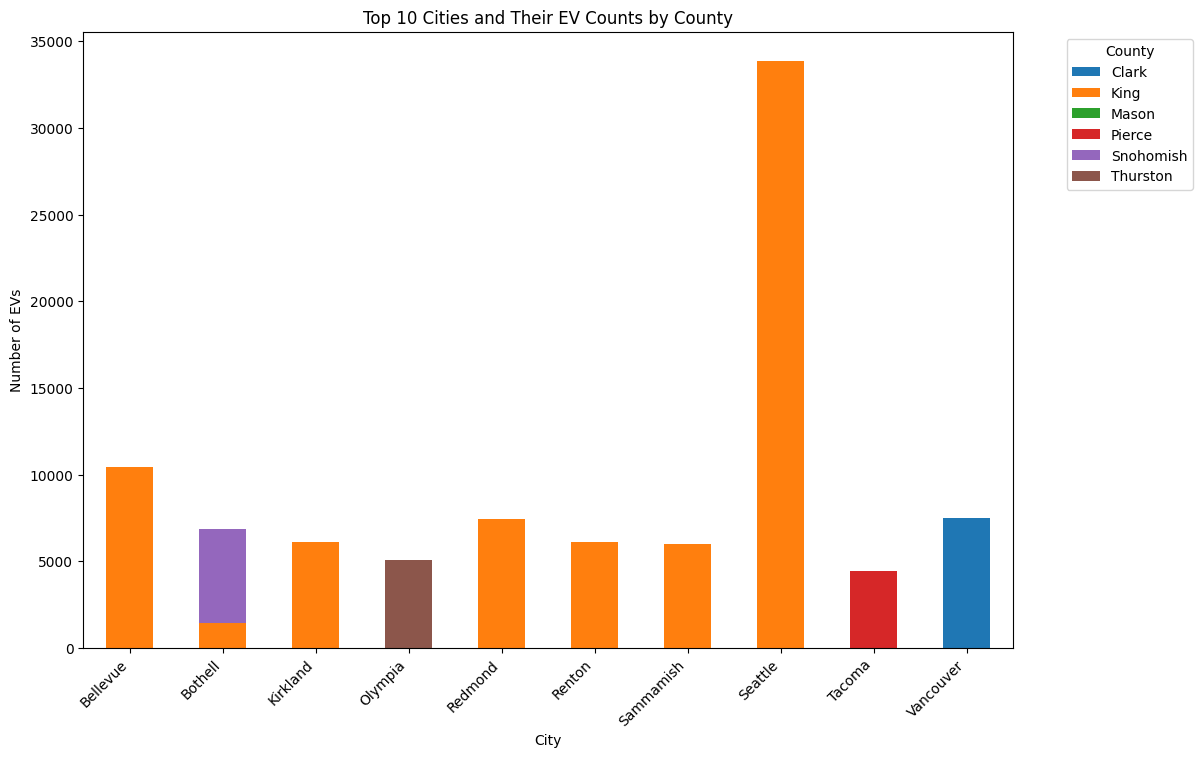

In [127]:
city_counts = df['City'].value_counts().head(10)
print(city_counts)
# Plot Bar Chart for EV distribution by City
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of EVs by City')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45, ha='right')
plt.show()


#count total EVs for each city
cityCounts = df['City'].value_counts().nlargest(10)
top_10_cities = cityCounts.index  # Get the names of the top 10 cities

# Filter the dataset to include only the top 10 cities
top_10_data = df[df['City'].isin(top_10_cities)]

# Group by City and County to get counts for each combination
cityCountyCounts = top_10_data.groupby(['City', 'County']).size().unstack(fill_value=0)

# Plot the stacked bar chart
cityCountyCounts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 10 Cities and Their EV Counts by County')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


**11. Temporal Analysis**

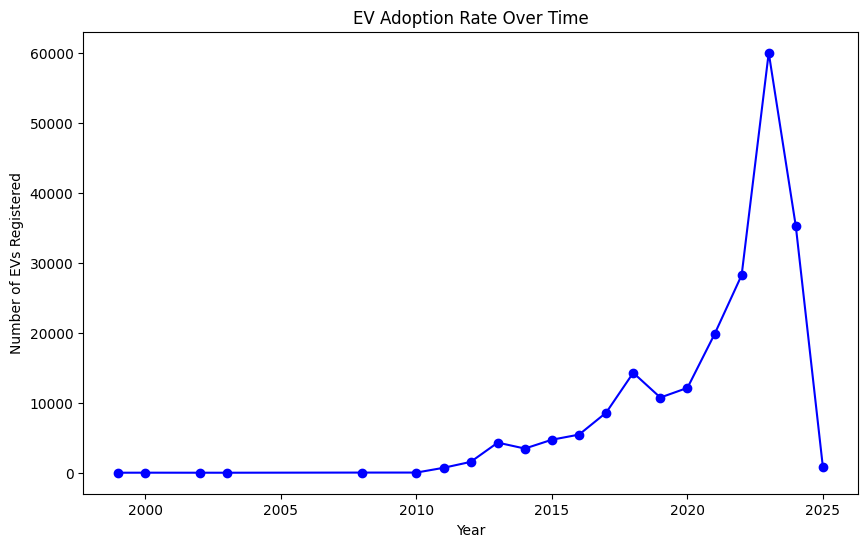

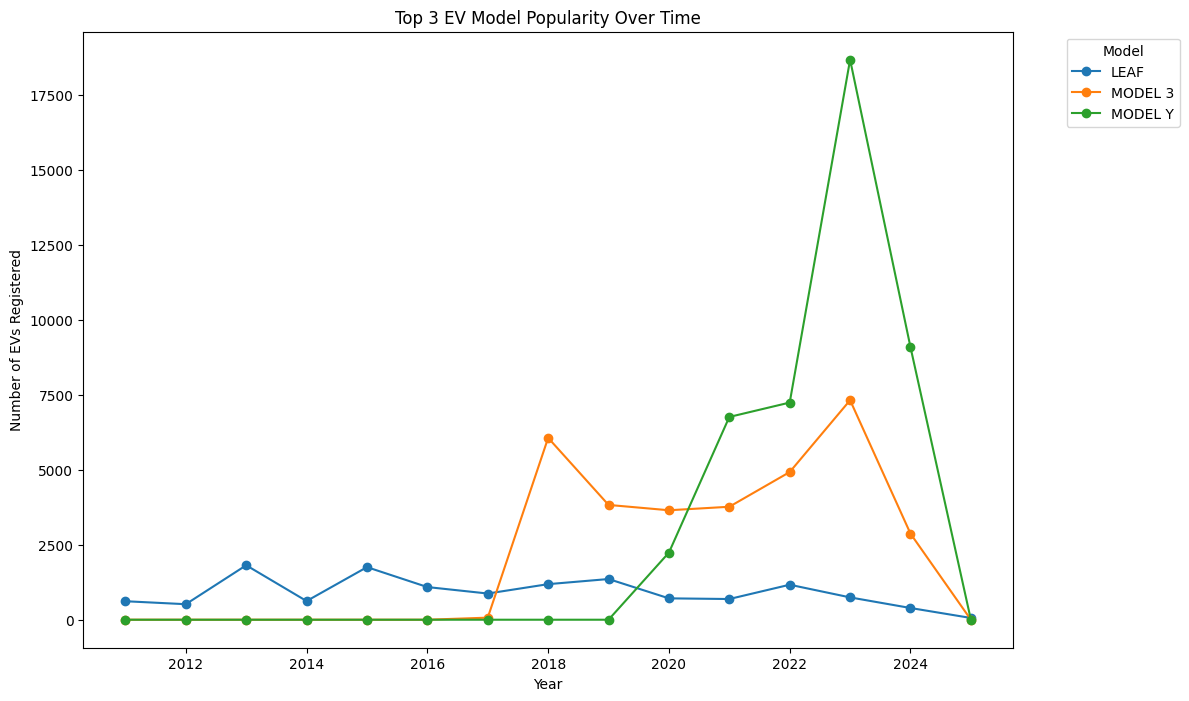

In [57]:


# Calculate EV adoption trend over time
trend = df.groupby(df['Model Year']).size()

# Plot EV adoption trend
plt.figure(figsize=(10, 6))
trend.plot(kind='line', marker='o', color='b')
plt.title('EV Adoption Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Number of EVs Registered')
plt.show()


# Select the top 3 models
top_3_models = df['Model'].value_counts().nlargest(3).index

# Filter data to include only the top 3 models
top_3_data = df[df['Model'].isin(top_3_models)]

# Calculate model popularity over time for the top 3 models
model_popularity_top_10 = top_3_data.groupby(['Model Year', 'Model']).size().unstack(fill_value=0)

# Plot model popularity trend over time for the top 3 models
model_popularity_top_10.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Top 3 EV Model Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of EVs Registered')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()